<a href="https://colab.research.google.com/github/EmiJacobo/EmiJacobo/blob/main/CRISP_DM_1075663.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Universidad Juarez del estado de Durango
## Proyecto final - Mineria de datos
## Profesor: Dr. Geronimo Quiñonez Barraza
## Alumno Emiliano Jacobo Perez
## Matricula : 1075663



### Comprension del negocio
El propósito de este análisis es utilizar técnicas de Aprendizaje Automático No Supervisado para descubrir la estructura oculta del mercado inmobiliario del estado de California . Buscamos segmentar el inventario de viviendas en "perfiles" o "clusters" bien definidos con la finalidad de mejorar la toma de decisiones.


### Entendimiento de los Datos
La base de datos a usar es la llamada California Husing de 1990, la cual se centra en el Censo de poblacion de california (EUA) en 1990.

Esta base de datos considera la informacion por bloques (Blocks) de que en promedio contempla 1425.5 casas.

Las variables que miden las distancias se calcularon mediante los centroides de los clusters.

El db contiene 20640 observaciones y 9 variables las cuales son el valor medio de la vivienda, el ingreso medio, la edad media de la vivienda, el total de habitaciones, el total de dormitorios, la población, los hogares, la latitud y la longitud, en ese orden.

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar y limpiar datos
# Cargamos la base de datos
from google.colab import drive
drive.mount('/content/drive')
data = '/content/drive/MyDrive/MAEA - FCE/MINERIA DE DATOS/2. ARCHIVOS 2025/CRISP/California_Houses.csv'
df = pd.read_csv(data)
print("Información general del DataFrame:")
df.info()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distanc

In [66]:
df.head(10)

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   
5            269700.0         4.0368          52        919           213   
6            299200.0         3.6591          52       2535           489   
7            241400.0         3.1200          52       3104           687   
8            226700.0         2.0804          42       2555           665   
9            261100.0         3.6912          52       3549           707   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733070   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   
5         413         193     37.85    -122.25        7768.086571   
6        1094         514     37.84    -122.25        6843.020847   
7        1157         647     37.84    -122.25        6843.020847   
8        1206         595     37.84    -122.26        6363.948013   
9        1551         714     37.84    -122.25        6843.020847   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0     556529.1583           735501.8070          67432.51700   
1     554279.8501           733236.8844          65049.90857   
2     554610.7171           733525.6829          64867.28983   
3     555194.2661           734095.2907          65287.13841   
4     555194.2661           734095.2907          65287.13841   
5     555194.2661           734095.2907          65287.13841   
6     554364.4069           733249.8086          64315.99174   
7     554364.4069           733249.8086          64315.99174   
8     554949.7495           733820.8244          64751.46386   
9     554364.4069           733249.8086          64315.99174   

   Distance_to_SanFrancisco  
0               21250.21377  
1               20880.60040  
2               18811.48745  
3               18031.04757  
4               18031.04757  
5               18031.04757  
6               17538.20997  
7               17538.20997  
8               16744.40658  
9               17538.20997

In [67]:
#Revisamos cuantas filas y columnas tenemos
df.shape

(20640, 14)

In [68]:
#Revisamos si existen NAS para imputar
print(df.isnull().sum())

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


Revisando, no hay datos nulos o NAs que imputar por lo cual no será necesario realizar ningun metodo para rellenar la base de datos


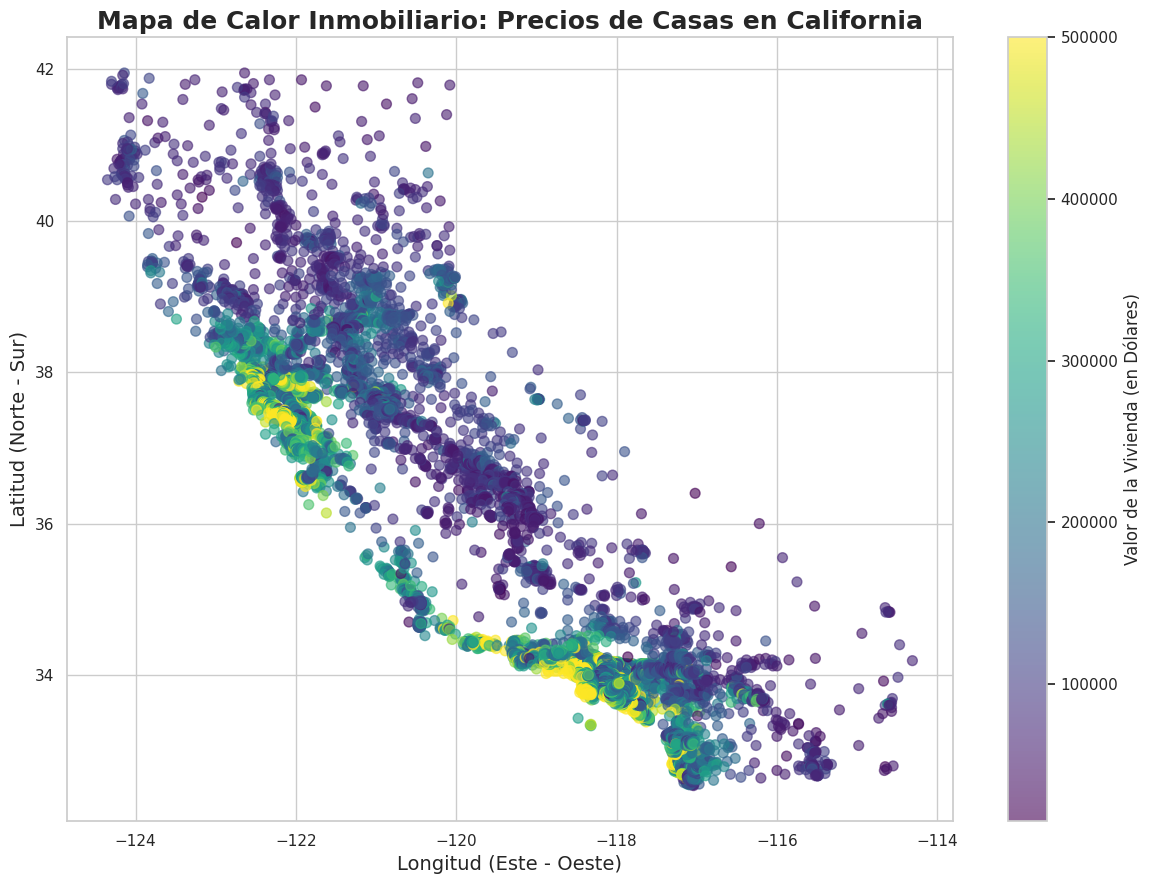

In [73]:
# Configuración del estilo del gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 9))

# Crear el gráfico de dispersión (Scatter Plot)
# x = Longitud, y = Latitud, c = Color basado en el precio
mapa = plt.scatter(df['Longitude'], df['Latitude'],
                   c=df['Median_House_Value'],
                   cmap='viridis',   # Escala de colores: Morado (Barato) -> Amarillo (Caro)
                   alpha=0.6,        # Ligeramente transparente para ver la concentración
                   s=50)             # Tamaño de cada punto

# Añadir una barra guía de colores a la derecha
barra_color = plt.colorbar(mapa)
barra_color.set_label('Valor de la Vivienda (en Dólares)', fontsize=12)

# Añadir títulos y etiquetas
plt.title('Mapa de Calor Inmobiliario: Precios de Casas en California', fontsize=18, fontweight='bold')
plt.xlabel('Longitud (Este - Oeste)', fontsize=14)
plt.ylabel('Latitud (Norte - Sur)', fontsize=14)

plt.tight_layout()
plt.show()

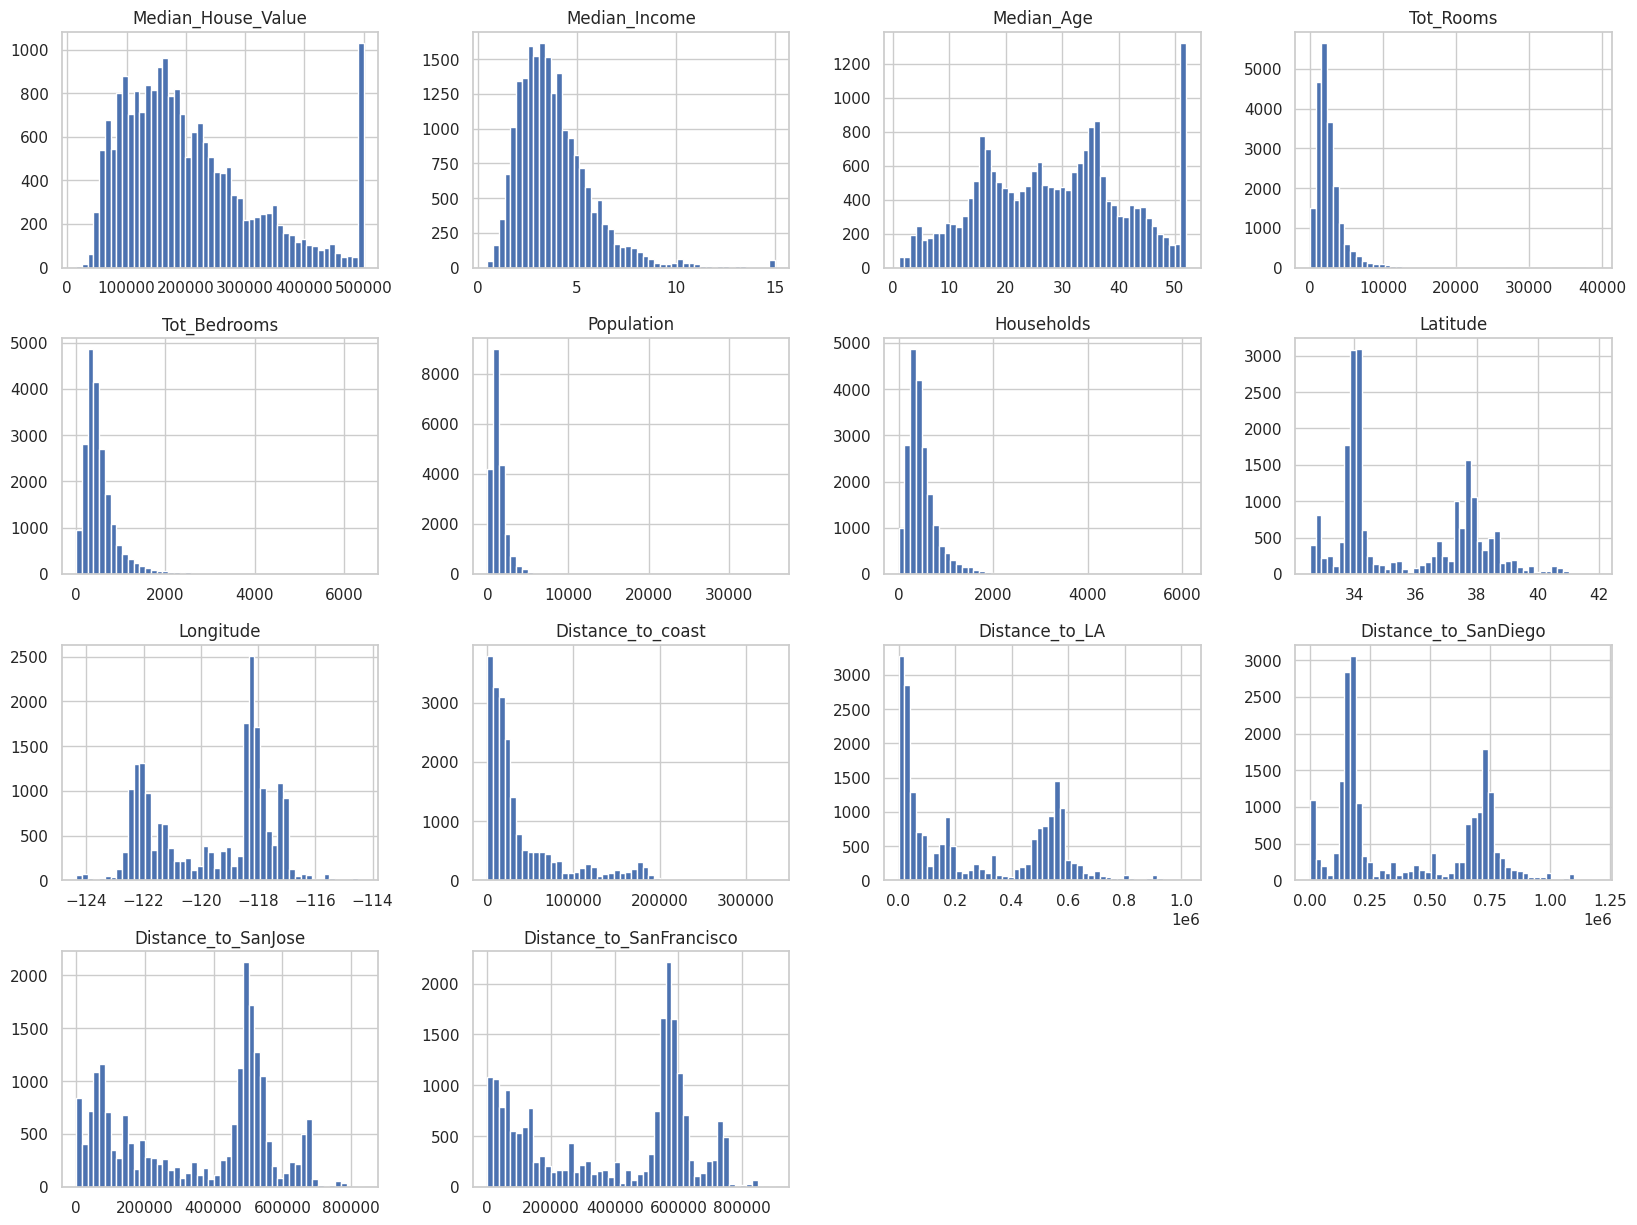

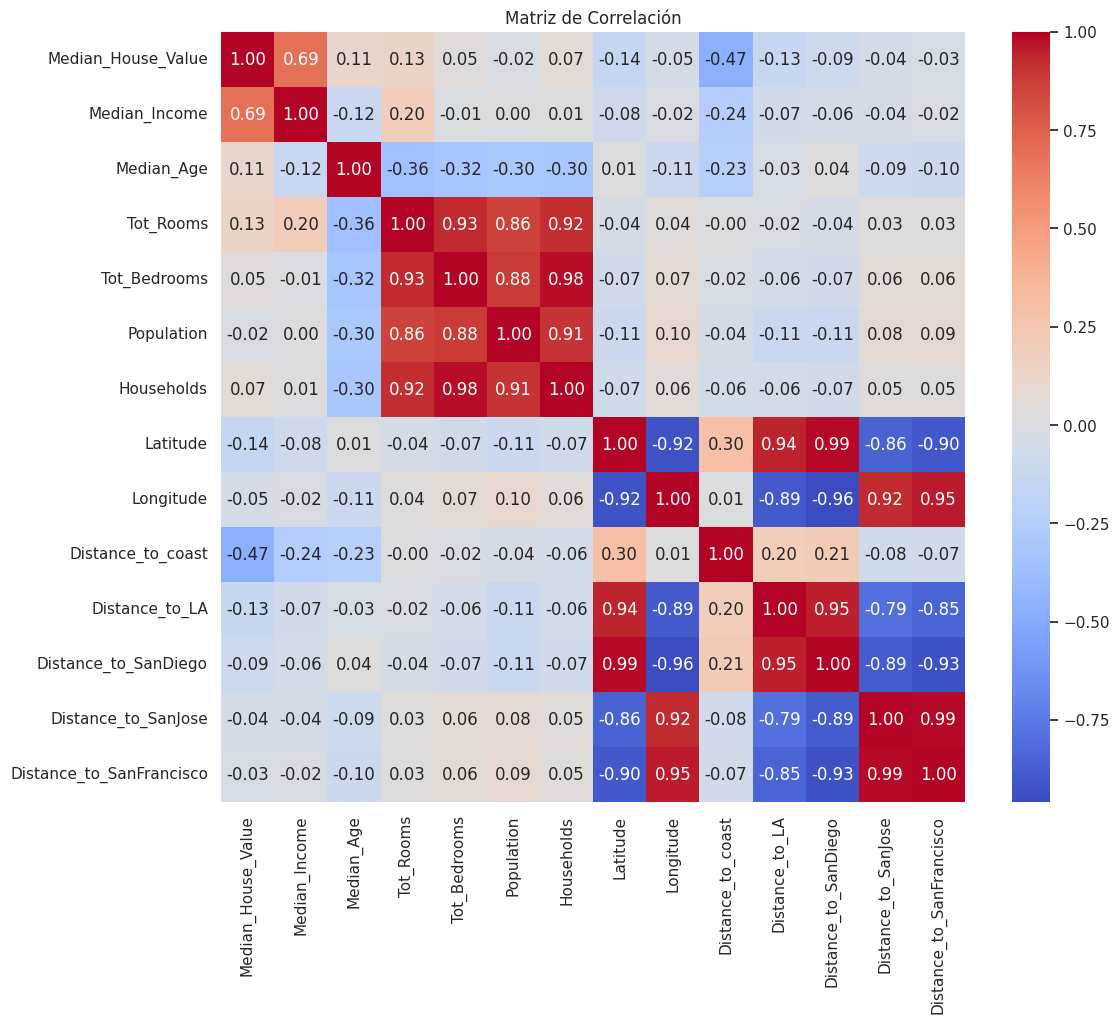

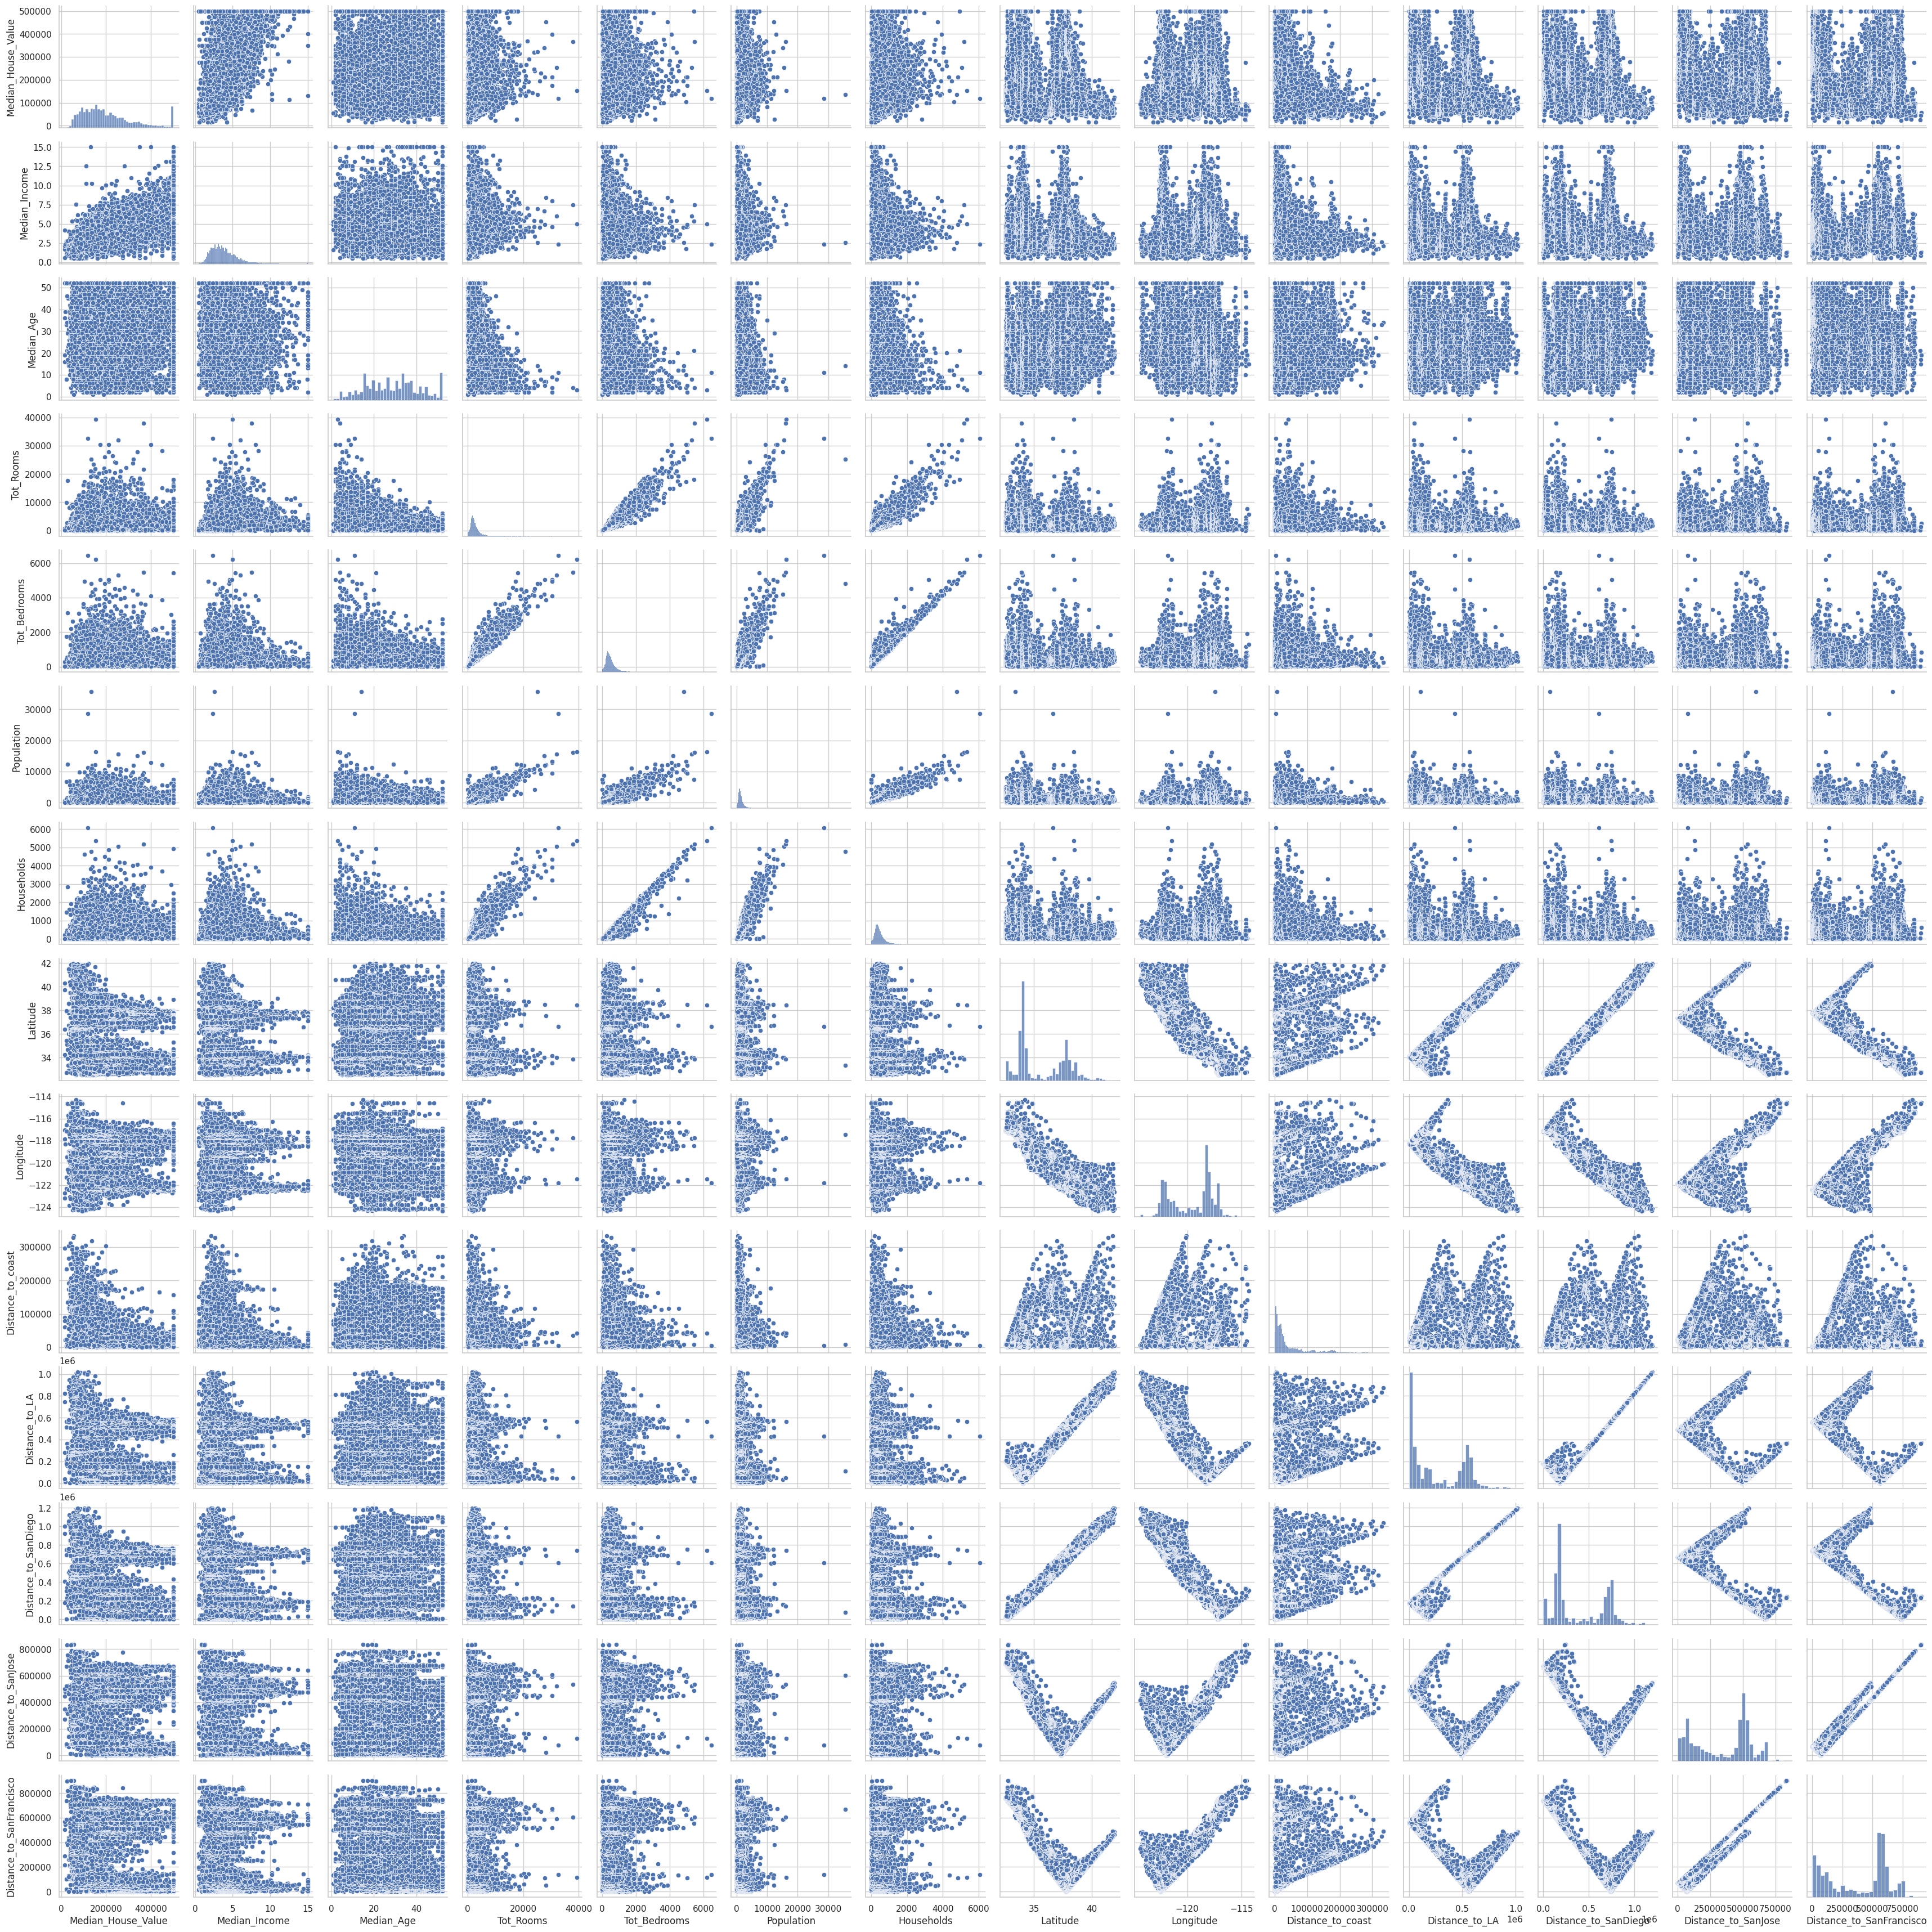

In [69]:
# Histogramas para visualizar la distribución de cada variable
df.hist(bins=50, figsize=(20,15))
plt.show()

# Matriz de correlación para observar la relación entre las variables
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Gráficos de dispersión para visualizar la relación entre pares de variables
sns.pairplot(df)
plt.show()

* **Correlación fuerte positiva:** Existe una relación muy fuerte y positiva entre Median_House_Value (Valor Medio de la Vivienda) y Median_Income (Ingreso Medio), con un coeficiente de 0.69. Esto indica que, a medida que aumenta el ingreso medio en un bloque, el valor medio de las viviendas tiende a ser mayor.

* **Variables de tamaño y población:** Tal como mencionaste, hay una fuerte correlación entre las variables relacionadas con el tamaño de las viviendas y la población. Por ejemplo, Tot_Rooms, Tot_Bedrooms, Population y Households suelen estar altamente correlacionadas entre sí, lo que es lógico ya que bloques con más habitaciones o población suelen tener más hogares.

* **Edad de la Vivienda (Median_Age):** Muestra una correlación muy débil positiva con Median_House_Value (0.11). Esto sugiere que la edad de la vivienda no es un factor determinante tan fuerte en el valor de la casa como el ingreso medio.

* **Distancia a ciudades (Distance_to_LA)**: Presenta una correlación moderada negativa con Median_House_Value (-0.20). Esto significa que las viviendas más cercanas a Los Ángeles tienden a tener un valor medio más alto. Las distancias a otras ciudades como San Diego, San José y San Francisco tienen correlaciones negativas pero más débiles con el valor de la vivienda, y la Distance_to_coast tiene una correlación muy débil negativa.

* **Latitud y Longitud:** Muestran correlaciones débiles con el valor de la vivienda, indicando que la ubicación geográfica por sí sola, sin considerar otros factores, tiene un impacto limitado en el valor.

En conclusión se puede decir que el ingreso medio es el predictor mas fuerte del valor de la vivienda.


Podemos visualizar com es que hay una fuerte correlacion entre las variables relacionadas a la poblacion y el numero de habitaciones pero una correlación no tan fuerte entre las del valor promedio de las casas por bloque y la distancia a las ciudades mas cercanas (san diego y san francisco) y una correlacion muy debil con relacion a si se encuentra cerca a la playa o no.

### Preparacion de los datos

Limpieza: Se eliminaron los registros con datos faltantes (nulos) para evitar errores de cálculo en el algoritmo.
Partición de Datos (Train/Validation/Test): Para garantizar que nuestro modelo sea robusto y generalizable al mundo real, se dividieron los datos en tres grupos:
Entrenamiento (70%): Usado por el algoritmo para buscar patrones.
Validación (15%): Usado para afinar el modelo y descubrir el número ideal de segmentos.
Prueba (15%): Un conjunto de datos "ciego" que el modelo nunca vio, usado para auditar su precisión final.
Estandarización (Scaling): Dado que el algoritmo mide distancias matemáticas entre las propiedades, se aplicó la técnica StandardScaler. Esto normaliza las variables , transformando todas las variables a una misma escala neutral.

In [49]:
# División 70% Train, 30% Temporal
X_train, X_temp = train_test_split(X, test_size=0.30, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.50, random_state=42)

# Estandarización (Scaling)
scaler = StandardScaler()

# Entrenamos la báscula con los datos de Train y transformamos todos
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Modelado y evaluación

Para este proyecto, al no tener una variable a predecir, sino buscar patrones de agrupación, se seleccionó el algoritmo K-Means Clustering (Agrupación K-Medias).
Este modelo ubica "centros de gravedad" en los datos y agrupa las casas que tienen características más similares entre sí.

Parámetros Utilizados y su Justificación:
n_clusters = 3: Se utilizó el Método del Codo (Elbow Method) en el set de
Validación para probar desde 2 hasta 10 grupos.
La matemática dictaminó que 3 es la división natural del mercado inmobiliario californiano.
random_state = 42: Se estableció una "semilla" aleatoria fija.
n_init = 10: Indica al algoritmo que ejecute el proceso de agrupación 10 veces distintas desde diferentes puntos de partida y se quede con el resultado estadísticamente más perfecto.


In [50]:
mejor_k = 2
mejor_silueta = -1

# Probamos dividiendo el mapa en 2, 3, 4 y 5 grupos
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled) # Aprende a agrupar con Train
    etiquetas_val = kmeans.predict(X_val_scaled) # Etiqueta al grupo de Validación

    # Calculamos la silueta (Qué tan buenos son los grupos)
    score = silhouette_score(X_val_scaled, etiquetas_val)
    print(f"Silueta para K={k}: {score:.4f}")

    if score > mejor_silueta:
        mejor_silueta = score
        mejor_k = k

print(f"\nEl número matemáticamente ideal de grupos es: {mejor_k}")

Silueta para K=2: 0.4263
Silueta para K=3: 0.4439
Silueta para K=4: 0.4076
Silueta para K=5: 0.3054

El número matemáticamente ideal de grupos es: 3


Perfil promedio de cada Grupo de Casas:
        Median_House_Value  Median_Income  Median_Age  Distance_to_coast
Cluster                                                                 
0              $193,446.82       3.712634   29.566238       52183.664060
1              $216,356.20       3.968761   29.599001       28446.766939
2              $216,623.03       4.268048   15.568966       42792.944470


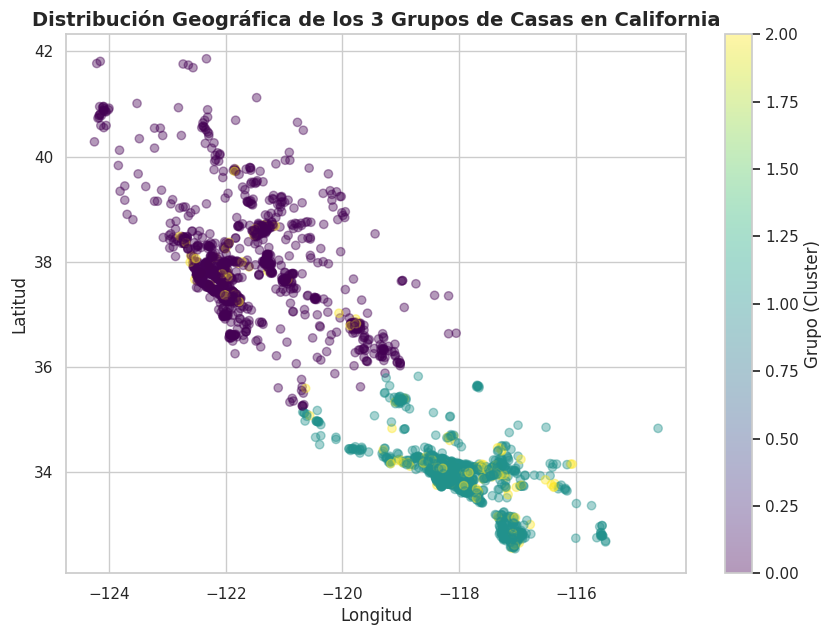

In [74]:
# Entrenar modelo final
kmeans_final = KMeans(n_clusters=mejor_k, random_state=42, n_init=10)
kmeans_final.fit(X_train_scaled)

# Examen final (Asignar casas del set Test a un grupo)
etiquetas_test = kmeans_final.predict(X_test_scaled)
score_test = silhouette_score(X_test_scaled, etiquetas_test)

# Analizar las características de cada tribu creada
X_test_analisis = X_test.copy()
X_test_analisis['Cluster'] = etiquetas_test

# Añadir la columna 'Median_House_Value' de vuelta a X_test_analisis para el análisis
X_test_analisis['Median_House_Value'] = df.loc[X_test_analisis.index, 'Median_House_Value']

# Calculamos el promedio de las variables de interés por grupo
centroides = X_test_analisis.groupby('Cluster')[['Median_House_Value', 'Median_Income', 'Median_Age', 'Distance_to_coast']].mean()

# Formateo de dinero para mejor lectura
centroides['Median_House_Value'] = centroides['Median_House_Value'].apply(lambda x: f"${x:,.2f}")
print("Perfil promedio de cada Grupo de Casas:")
print(centroides)

# Gráfico para visualizar dónde quedaron estos grupos en el mapa geográfico (Latitud vs Longitud)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_test['Longitude'], X_test['Latitude'], c=etiquetas_test, cmap='viridis', alpha=0.4)
plt.colorbar(scatter, label='Grupo (Cluster)')
plt.title('Distribución Geográfica de los 3 Grupos de Casas en California', fontsize=14, fontweight='bold')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

* Cluster 0: "Viviendas en zonas de bajo valor en el interior del estado"
Valor de Vivienda: Bajo (aprox $193,000).
Perfil Demográfico: Zonas de menores ingresos.
Geografía: Son las propiedades más alejadas de la costa (a más de 50 km de distancia).

* Cluster 1: "Viviendas en zonas costeras"
Valor de Vivienda: Alto (aprox $216,400).
Perfil Demográfico: Ingresos medios a altos. Viviendas con mucha antigüedad (casi 30 años de edad promedio).
Geografía: El factor clave es que son las zonas más cercanas al océano (~28 km).

* Cluster 2: "Viviendas en zonas lujosas "
Valor de Vivienda: Alto / Premium (aprox$216,600).
Perfil Demográfico: Son las zonas con los ingresos más altos de todo el estado. Las viviendas son notablemente nuevas (apenas 15 años de edad promedio).
Geografía: Se ubican a una distancia intermedia de la costa. Su valor no depende del mar, sino de la modernidad, exclusividad y la afluencia económica de la zona.


Se aprecia claramente la forma en la que se distribuyen los clusters de viviendas en el estado de California.

El cluster 0 es el que presenta las viviendas del valle, con un valor menor promedio a $200,000 mil dolares y son casas con una antguedad promedio de 30 años y una distancia a la costa de al rededor de mas de 52,000 millas

Las viviendas mas caras se ubican en el cluster 2 mas amarillas que se concentran en las costas y en ciudades como los angeles, san diego y silicon valley


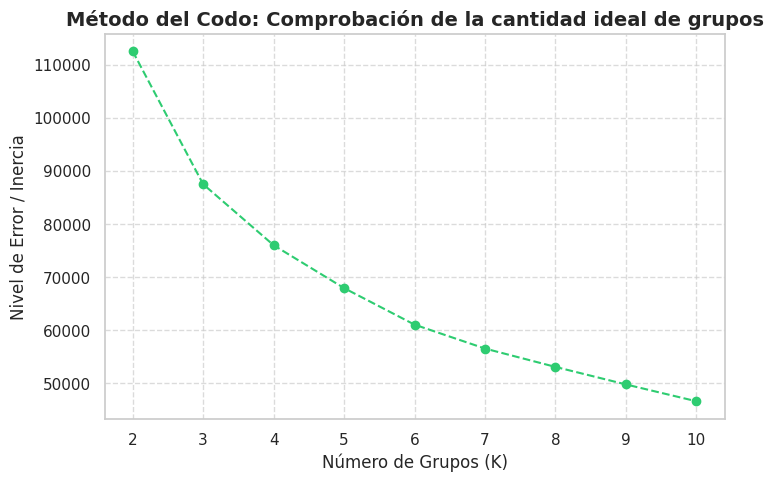


--- RESULTADOS DE LA PRUEBA ESTADÍSTICA (ANOVA) ---
Valor 'P' (Probabilidad de que esto sea casualidad): 0.0000002702

CONCLUSIÓN: Los grupos son ESTADÍSTICAMENTE DISTINTOS. La segmentación del mercado es 100% válida y exitosa.


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats

# ==========================================
# PRUEBA 1: El Método del Codo (Matemática visual)
# ==========================================
inercia = [] # Lista para guardar el error interno de los grupos
rango_k = range(2, 11) # Probaremos de 2 a 10 grupos

for k in rango_k:
    # Creamos un modelo temporal para cada cantidad de grupos
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_train_scaled)
    inercia.append(kmeans_temp.inertia_)

# Dibujamos el gráfico del Codo
plt.figure(figsize=(8, 5))
plt.plot(rango_k, inercia, marker='o', linestyle='--', color='#2ecc71')
plt.title('Método del Codo: Comprobación de la cantidad ideal de grupos', fontsize=14, fontweight='bold')
plt.xlabel('Número de Grupos (K)')
plt.ylabel('Nivel de Error / Inercia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# PRUEBA 2: Análisis Estadístico ANOVA
precios_grupo_0 = X_test_analisis[X_test_analisis['Cluster'] == 0]['Median_House_Value']
precios_grupo_1 = X_test_analisis[X_test_analisis['Cluster'] == 1]['Median_House_Value']
precios_grupo_2 = X_test_analisis[X_test_analisis['Cluster'] == 2]['Median_House_Value']

# ANOVA calcula si estos tres grupos son realmente distintos entre sí
f_stat, p_value = stats.f_oneway(precios_grupo_0, precios_grupo_1, precios_grupo_2)

print("\n--- RESULTADOS DE LA PRUEBA ESTADÍSTICA (ANOVA) ---")
print(f"Valor 'P' (Probabilidad de que esto sea casualidad): {p_value:.10f}")

# Evaluación automática
if p_value < 0.05:
    print("\nCONCLUSIÓN: Los grupos son ESTADÍSTICAMENTE DISTINTOS. La segmentación del mercado es 100% válida y exitosa.")
else:
    print("\nCONCLUSIÓN: Los grupos no muestran diferencias reales significativas.")

In [59]:
train_silhouette = silhouette_score(X_train_scaled, train_labels)
test_silhouette = silhouette_score(X_test_scaled, test_labels)

print(f"Silhouette score (training): {train_silhouette}")
print(f"Silhouette score (testing): {test_silhouette}")
if abs(train_silhouette - test_silhouette) > 0.1:
  print("Warning: The model may be overfitting.")
else:
  print("The model does not appear to be overfitting.")

Silhouette score (training): 0.43858729367307653
Silhouette score (testing): 0.44391356498593126
The model does not appear to be overfitting.


## Conclusion
La aplicación de minería de datos revela que California no es un solo mercado, sino tres economías inmobiliarias distintas. Se recomienda accionar o ver estrategias ya sea para el sector inmobiliario o de desarrollo:

* Para la División de Desarrollo y Construcción (Enfoque en Cluster 2): Existe una alta viabilidad y demanda por zonas modernas y exclusivas. Se recomienda invertir en construir fraccionamientos nuevos en zonas de interior medio. Los datos demuestran que los perfiles de altos ingresos están dispuestos a pagar precios nivel-costa por la exclusividad de un hogar nuevo, incluso si no están frente al mar.

* Para la División de Inversión a Largo Plazo (Enfoque en Cluster 1): Las casas costeras maduras son "activos refugio". Su proximidad al mar garantiza su alto valor sin importar su edad. Se recomienda mantener estas propiedades en el portafolio corporativo como anclas financieras de bajo riesgo.

* Para la División de Ventas e Inversión Rápida ("Flipping") (Enfoque en Cluster 0): En estas zonas económicas de interior es donde se puede comprar barato. La estrategia debe ser adquirir, remodelar para aumentar el valor percibido, y vender a familias jóvenes o de ingresos medios que buscan su primera vivienda, generando márgenes de ganancia ágiles.

---
---
